# chapter10

k_means clustering : 1. hierarchical 2. density_based 

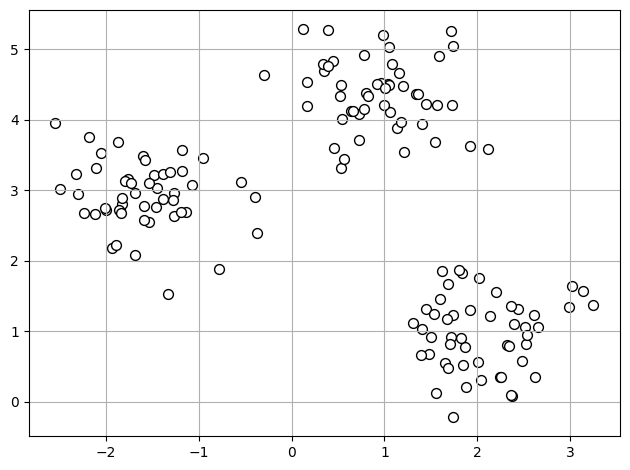

In [2]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)
import matplotlib.pyplot as plt
plt.scatter(x[:,0],
            x[:,1],
            c='white',
            marker='o',
            edgecolors='black',
            s=50
)
plt.grid()
plt.tight_layout()
plt.show()

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(x)

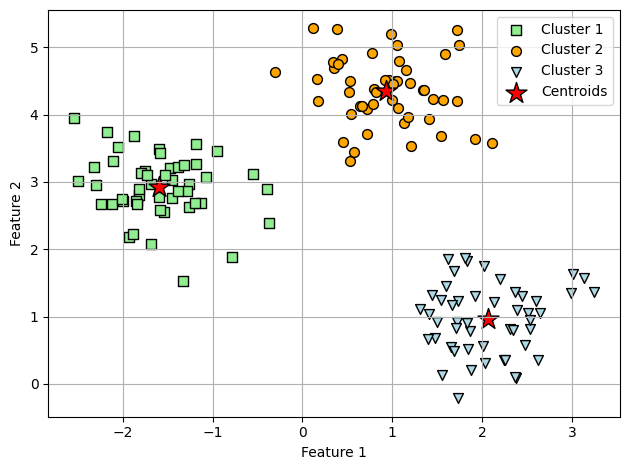

In [4]:
plt.scatter(x[y_km == 0, 0],
x[y_km == 0, 1],
s=50, c='lightgreen',
marker='s', edgecolor='black',
label='Cluster 1')
plt.scatter(x[y_km == 1, 0],
x[y_km == 1, 1],
s=50, c='orange',
marker='o', edgecolor='black',
label='Cluster 2')
plt.scatter(x[y_km == 2, 0],
x[y_km == 2, 1],
s=50, c='lightblue',
marker='v', edgecolor='black',
label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
km.cluster_centers_[:, 1],
s=250, marker='*',
c='red', edgecolor='black',
label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

smarter way to initialize centriods

M : stores the centroids, and each time wa want to choose a new centroid we try to find the farest from the other in M

using elbow method to find the optimal number of clusters

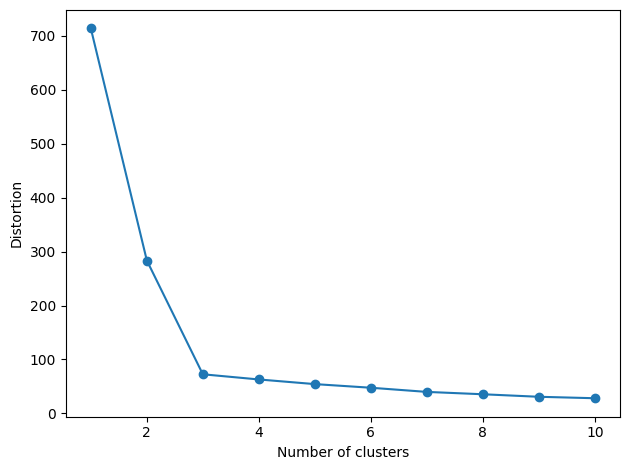

In [5]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=0)
    km.fit(x)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

silhouette analysis

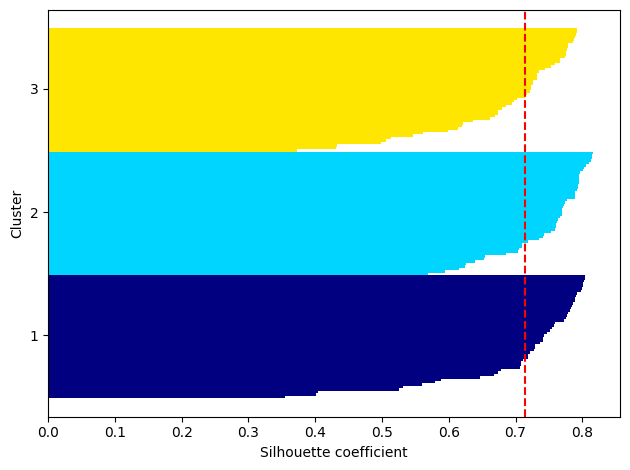

In [6]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(x)
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(
    x, y_km, metric='euclidean'
)
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
    c_silhouette_vals,
    height=1.0,
    edgecolor='none',
    color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

bad kmeans model with 2 centroids

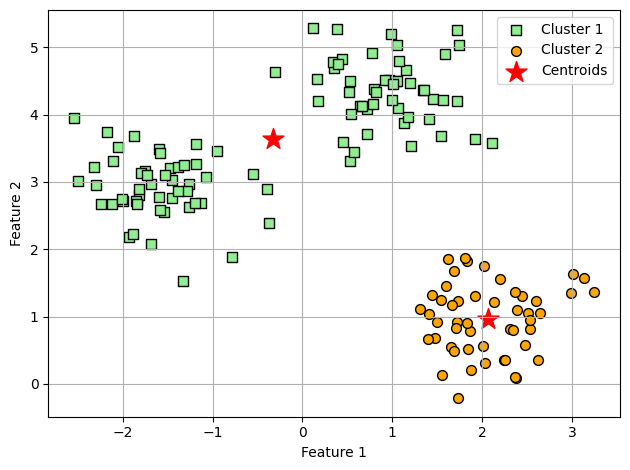

In [8]:
km = KMeans(n_clusters=2,
init='k-means++',
n_init=10,
max_iter=300,
tol=1e-04,
random_state=0)
y_km = km.fit_predict(x)
plt.scatter(x[y_km == 0, 0],
x[y_km == 0, 1],
s=50, c='lightgreen',
edgecolor='black',
marker='s',
label='Cluster 1')
plt.scatter(x[y_km == 1, 0],
x[y_km == 1, 1],
s=50,
c='orange',
edgecolor='black',
marker='o',
label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0],
km.cluster_centers_[:, 1],
s=250,
marker='*',
c='red',
label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(
X, y_km, metric='euclidean'
)
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
    c_silhouette_vals,
    height=1.0,
    edgecolor='none',
    color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()
